In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import datasets
from matplotlib.colors import ListedColormap

np.set_printoptions(precision=3, suppress=True)



In [2]:
# сгеренируем данные с помощью sklearn.datasets
classes = datasets.make_classification(n_samples=100, n_features=2, n_informative=2,
                                       n_redundant=0, n_classes=2, random_state=1)
# datasets.make_blobs(centers = 2, cluster_std = 1.5, random_state=12)



In [3]:
# перемешивание датасета
np.random.seed(12)
shuffle_index = np.random.permutation(classes[0].shape[0])
X_shuffled, y_shuffled = classes[0][shuffle_index], classes[1][shuffle_index]

#Добавляем единицы для смещения w2
X_shuffled = np.c_[X_shuffled, np.ones(X_shuffled.shape[0])]

# разбивка на обучающую и тестовую выборки
train_proportion = 0.5
train_test_cut = int(len(classes[0]) * train_proportion)

X_train, X_test, y_train, y_test = \
    X_shuffled[:train_test_cut], \
    X_shuffled[train_test_cut:], \
    y_shuffled[:train_test_cut], \
    y_shuffled[train_test_cut:]

X_train_tr = X_train.transpose()
y_train_tr = y_train.reshape(1, y_train.shape[0])
X_test_tr = X_test.transpose()
y_test_tr = y_test.reshape(1, y_test.shape[0])
    
print("Размер массива признаков обучающей выборки", X_train_tr.shape)
print("Размер массива признаков тестовой выборки", X_test_tr.shape)
print("Размер массива ответов для обучающей выборки", y_train_tr.shape)
print("Размер массива ответов для тестовой выборки", y_test_tr.shape)


Размер массива признаков обучающей выборки (3, 50)
Размер массива признаков тестовой выборки (3, 50)
Размер массива ответов для обучающей выборки (1, 50)
Размер массива ответов для тестовой выборки (1, 50)


In [4]:
def calc_logloss(y, y_pred):
    d0 = 1e-4 # чтобы избежать 0 в np.log просто добавим очень малое число. Функция останется монотонной и определенной на [0, inf)
    err = - np.mean(y * np.log(y_pred + d0) + (1.0 - y) * np.log(1.0 - y_pred + d0))
    return err

In [5]:
def sigmoid(z):
    res = 1 / (1 + np.exp(-z))
    return res

In [6]:
def train_model(X, y, iterations, alpha=1e-4):
    np.random.seed(42)
    W = np.random.randn(1, X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        z = W.dot(X)
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)
        W -= alpha * (1/n * (y_pred - y).dot(X.T))
#        if i % (iterations / 10) == 0:
#    print(i, W, err)
    return W, err

In [7]:
alpha_best = None
n_iter_best = None
err_best = 100
for n_iter in [1000, 10000, 100000]:
    for alpha in [0.5, 0.1, 0.01, 0.001]:
        W, err = train_model(X_train_tr, y_train_tr, n_iter, alpha)
        print(f'n_iter = {n_iter}, alpha = {alpha}, log_loss={err}, W=', W)
        if err < err_best * 0.99:
            alpha_best = alpha
            n_iter_best = n_iter
            err_best = err
#наилучший результат:
W, err = train_model(X_train_tr, y_train_tr, n_iter_best, alpha_best)
print(f'Best: n_iter = {n_iter_best}, alpha = {alpha_best}, log_loss={err_best}, W=', W)


n_iter = 1000, alpha = 0.5, log_loss=0.03910646421150212, W= [[6.892 0.237 2.344]]
n_iter = 1000, alpha = 0.1, log_loss=0.05815811618806649, W= [[4.63  0.305 1.021]]
n_iter = 1000, alpha = 0.01, log_loss=0.15525224315311711, W= [[2.208 0.106 0.346]]
n_iter = 1000, alpha = 0.001, log_loss=0.40844092557861833, W= [[ 0.822 -0.068  0.541]]
n_iter = 10000, alpha = 0.5, log_loss=0.019897162821299816, W= [[14.406 -0.303  6.855]]
n_iter = 10000, alpha = 0.1, log_loss=0.03305179594842248, W= [[8.35  0.126 3.263]]
n_iter = 10000, alpha = 0.01, log_loss=0.058166050437743054, W= [[4.629 0.305 1.02 ]]
n_iter = 10000, alpha = 0.001, log_loss=0.15522793683586175, W= [[2.207 0.106 0.346]]
n_iter = 100000, alpha = 0.5, log_loss=0.004410426061070823, W= [[35.548 -1.641 18.521]]
n_iter = 100000, alpha = 0.1, log_loss=0.014409353896407457, W= [[18.936 -0.609  9.409]]
n_iter = 100000, alpha = 0.01, log_loss=0.03305275610566952, W= [[8.349 0.126 3.263]]
n_iter = 100000, alpha = 0.001, log_loss=0.05816683838

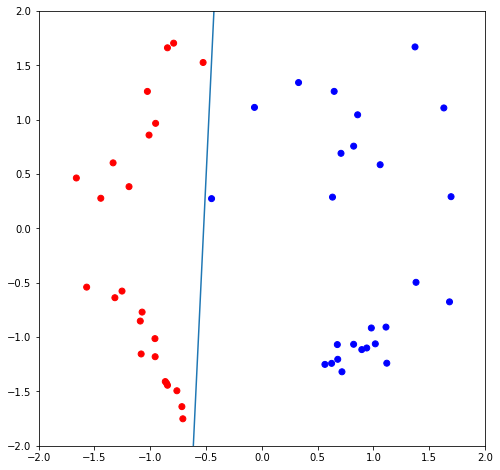

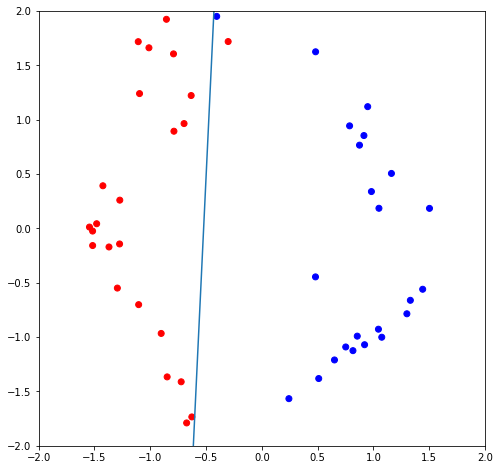

In [8]:
def draw_dots(X, y, W = None):
    colors = ListedColormap(['red', 'blue'])
    plt.figure(figsize=(8, 8))
    plt.scatter(X[0], X[1], c=y[0], cmap=colors)
    if W is not None:
        p = np.array([-W[0][1], W[0][0]]) # w0*p0 + w1*p1 + w2 = 0
        r = 2.3
        w20 = np.array([0.5 * W[0][2] / W[0][0], 0.5 * W[0][2] / W[0][1]]) if len(W[0]) > 2 else 0.
        p = np.array([-r * p - w20, r * p - w20]).T
        plt.plot(p[0], p[1])
        plt.xlim(-2, 2)
        plt.ylim(-2, 2)
        
draw_dots(X_train_tr, y_train_tr, W)
draw_dots(X_test_tr, y_test_tr, W)

In [9]:
def calc_pred_proba(w, X):
    return sigmoid(w.dot(X))

In [10]:
calc_pred_proba(W, X_test_tr)

array([[1.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 1.   ,
        1.   , 1.   , 0.286, 0.   , 0.   , 0.078, 0.003, 1.   , 1.   ,
        1.   , 0.   , 0.   , 1.   , 0.   , 0.724, 0.   , 1.   , 1.   ,
        1.   , 1.   , 1.   , 0.   , 1.   , 0.993, 1.   , 1.   , 0.   ,
        0.063, 0.   , 1.   , 1.   , 1.   , 0.   , 0.   , 0.   , 1.   ,
        0.008, 0.   , 1.   , 0.024, 1.   ]])

In [11]:
def calc_pred(w, X):
    return np.round(sigmoid(w.dot(X)))

In [12]:
y_pred = calc_pred(W, X_test_tr)

In [13]:
#y_train_pred = calc_pred(W, X_train_tr)
#np.c_[y_train_pred.T, y_train.T]

In [14]:
def accuracy(y_pred, y):
    a = np.sum((y_pred == y) * 1)/y_pred.shape[1]
    return a

In [15]:
def error_matrix(y_pred, y):
    TP = np.sum(((y_pred == 1) & (y == 1)) * 1)
    FP = np.sum(((y_pred == 1) & (y == 0)) * 1)
    FN = np.sum(((y_pred == 0) & (y == 1)) * 1)
    TN = np.sum(((y_pred == 0) & (y == 0)) * 1)
    return np.array([[TP, FP], [FN, TN]])

In [16]:
def precision(e_m):
    return e_m[0][0] / (e_m[0][0] + e_m[0][1])

In [17]:
def recall(e_m):
    return e_m[0][0] / (e_m[0][0] + e_m[1][0])

In [18]:
def F_b(e_m, b = 1):
    pr = precision(e_m)
    rc = recall(e_m)
    return (1 + b * b) * pr * rc / (b * b * pr + rc)

In [19]:
def print_metrics(y_pred, y):
    print(f"Доля правильных ответов: {accuracy(y_pred, y_test_tr):0.3f}")
    e_m = error_matrix(y_pred, y)
    print("Матрица ошибок: \n", e_m)
    print(f"Точность: {precision(e_m):0.3f}")
    print(f"Полнота: {recall(e_m):0.3f}")
    print(f"F1: {F_b(e_m):0.3f}")

In [20]:
print("------------------------------")
print("Тренировочная выборка")
print_metrics(calc_pred(W, X_train_tr), y_train_tr)
print("------------------------------")
print("Тестовая выборка")
print_metrics(y_pred, y_test_tr)

------------------------------
Тренировочная выборка
Доля правильных ответов: 0.600
Матрица ошибок: 
 [[26  0]
 [ 0 24]]
Точность: 1.000
Полнота: 1.000
F1: 1.000
------------------------------
Тестовая выборка
Доля правильных ответов: 0.980
Матрица ошибок: 
 [[24  1]
 [ 0 25]]
Точность: 0.960
Полнота: 1.000
F1: 0.980


# Выводы
* Все метрики посчитаны, результат на тестовой выборке получился ожидаемо хуже, чем на тренировочноый
* Добавление смещения w2 позволило отвести разделяющую прямую от точки (0, 0) и построить лучшую модель, которая идеально разделило тренировочную выборку. Но тестовую выборку разделить прямой не получится.
* Не могу представить себе переобучение такой модели с разделяющей прямой (плоскостью). Прямая останется прямой. Поэтому регуляризацию не делала. Но переобучение будет возможно, если разделяющая будет кривой. Для этого, видимо, надо добавить произведения и степени признаков. Может, попробую попозже, может и с регуляризацией. 